# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, median and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [66]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as plt

# load data
pg = pd.read_csv('progresa_sample.csv')

In [67]:
# check dataframe
display(pg.head())


,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,pobre,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [68]:
# recode `poor`: `pobre` == 1, `no pobre` == 0
display(pg.poor.value_counts())
pg['poor'].replace('pobre', 1, inplace=True)
pg['poor'].replace('no pobre', 0, inplace=True)
display(pg.poor.value_counts())

pobre       65392
no pobre    11858
Name: poor, dtype: int64

1    65392
0    11858
Name: poor, dtype: int64

In [69]:
# recode `progresa`: `basal` == 1
display(pg.progresa.value_counts())
pg['progresa'].replace('basal', 1, inplace=True)
pg['progresa'].replace('0', 0, inplace=True)
display(pg.progresa.value_counts())

basal    47560
0        29690
Name: progresa, dtype: int64

1    47560
0    29690
Name: progresa, dtype: int64

In [70]:
# check for null values
pg.isnull().sum()

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

In [71]:
# 1.1 Summary Statistics

pg.agg(func=['mean', 'median', 'std'])\
    .transpose()\
    .drop(['year', 'folnum', 'village'])\
    .sort_index()


,mean,median,std
age,11.366460,11.000000,3.167744
dist_cap,147.674452,132.001494,76.063134
dist_sec,2.418910,2.279000,2.234109
fam_n,7.215715,7.000000,2.352900
grc,3.963537,4.000000,2.499063
grc97,3.705372,4.000000,2.572387
hohage,44.436717,43.000000,11.620372
hohedu,2.768104,2.000000,2.656106
hohsex,0.925185,1.000000,0.263095
hohwag,586.985312,500.000000,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').



In [72]:
# 1.2 Differences at Baseline

# create dataframe with observations that are 'poor' and 1997 only
pg_poor_baseline  = pg[ (pg.poor == 1) & (pg.year == 97) ]

# create averages for control and treatment groups
pg_poor_baseline_stats = pg_poor_baseline.groupby(by=['progresa']).agg('mean') \
                         .transpose().sort_index().round(4) \
                         .rename_axis('Variable Name', axis='columns') \
                         .rename(mapper={1: 'Average Value (Treatment Villages)',
                                         0: 'Average Value (Control Villages)'}, axis=1)

# calculate difference
pg_poor_baseline_stats['Difference (Treat-Control)'] = pg_poor_baseline_stats['Average Value (Treatment Villages)'] \
                                                        - pg_poor_baseline_stats['Average Value (Control Villages)']

# run t-tests and get p-values
from scipy.stats import ttest_ind
vars = [ v for v in pg_poor_baseline_stats.index if v != 'progresa' ] # list of variables, except `progresa`
pvals = {}
for var in vars: # loop through each variable
    treatment = pg_poor_baseline.where( pg_poor_baseline['progresa'] == 1)[var].dropna()
    control = pg_poor_baseline.where( pg_poor_baseline['progresa'] == 0)[var].dropna()
    pvals[var] = ttest_ind(treatment, control, nan_policy='omit')[1] # save p-value for t-test for each variable

# join p-values to dataframe, drop unnecessary variables
pg_poor_baseline_stats = pg_poor_baseline_stats.join(pd.DataFrame.from_dict(pvals, orient='index', columns=['p-value']) \
                        .round(4)).drop(index=['poor', 'folnum', 'village', 'year'])

pg_poor_baseline_stats

,Average Value (Control Villages),Average Value (Treatment Villages),Difference (Treat-Control),p-value
age,10.7420,10.7170,-0.0250,0.4786
dist_cap,153.7697,150.8291,-2.9406,0.0008
dist_sec,2.5077,2.4531,-0.0546,0.0357
fam_n,7.3025,7.2813,-0.0212,0.4271
grc,3.5430,3.5316,-0.0114,0.6890
grc97,3.5430,3.5316,-0.0114,0.6890
hohage,44.2769,43.6488,-0.6281,0.0000
hohedu,2.5903,2.6631,0.0728,0.0111
hohsex,0.9229,0.9247,0.0018,0.5712
hohwag,573.1636,544.3395,-28.8241,0.0003


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

<font color='#2986cc'>

A. There are statistically significant differences in 8 variables: `dist_cap`, `dist_sec`, `hohage`, `hohedu`, `hohwag`, `min_dist`, `sex`, and `welfare_index`.

B. If there are statistically significant differences between treatment and control groups at baseline, those factors could be a confounding factor in evaluating the outcome of the experiment.

C. Since there are statistically significant differences in some variables between treatment and control groups, other impact evaluation methods like difference-in-difference (DD) should be used to account for the differences at baseline.

</font>

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

Average Enrollment Rate in 1997: 0.8138
Average Enrollment Rate in 1998: 0.8295
t-statistic: -6.0898
p-value: 1.1416386465817239e-09


/var/folders/xn/0rg9l6x17d59vnr3wc79xpjc0000gn/T/ipykernel_42521/2979337976.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


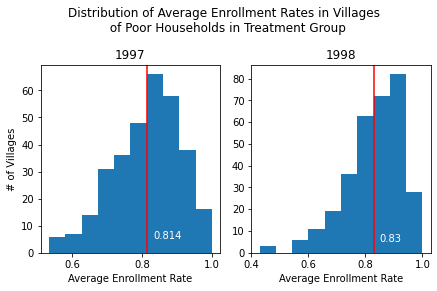

In [73]:
# 1.4 Graphical Exploration Pt. 1

# import matplotlib
import matplotlib.pyplot as plt

# create dataframe with poor households in treated villages
pg_poor_treat = pg[ (pg.poor == 1) & (pg.progresa == 1)]

# create figure with subplots
fig1 = plt.figure()
f1ax1 = fig1.add_subplot(1, 2, 1)
f1ax2 = fig1.add_subplot(1, 2, 2)

# calculate average enrollment rates (`sc`) of poor houses in treated villages
# grouped by villages, for '97 and '98
avgs_sc97 = pg_poor_treat[ pg_poor_treat['year'] == 97 ].groupby('village')['sc'].mean()
avgs_sc98 = pg_poor_treat[ pg_poor_treat['year'] == 98 ].groupby('village')['sc'].mean()

# create 2 histograms for average enrollment of poor houses in treated villages, for '97 and '98
f1ax1.hist( avgs_sc97 )
f1ax2.hist( avgs_sc98 )

# calculate average of averages
avg_sc97 = avgs_sc97.mean()
avg_sc98 = avgs_sc98.mean()

# add line for average of averages
f1ax1.axvline( x = avg_sc97, color='red' )
f1ax2.axvline( x = avg_sc98, color='red' )
f1ax1.text( x = avg_sc97 + 0.02, y = 5, s = avg_sc97.round(3), color = 'white' )
f1ax2.text( x = avg_sc98 + 0.02, y = 5, s = avg_sc98.round(3), color = 'white' )

# format chart: add title, axes labels, spacing
fig1.suptitle('Distribution of Average Enrollment Rates in Villages \n of Poor Households in Treatment Group')
fig1.tight_layout( rect=[0, 0.03, 1, 0.95] )

f1ax1.title.set_text('1997')
f1ax1.set_ylabel('# of Villages')
f1ax1.set_xlabel('Average Enrollment Rate')

f1ax2.title.set_text('1998')
f1ax2.set_xlabel('Average Enrollment Rate')

fig1.show()

# conduct t-test and retrieve t-statistic and p-value
t1, p1 = ttest_ind(pg_poor_treat[ pg_poor_treat['year'] == 97 ]['sc'], \
    pg_poor_treat[ pg_poor_treat['year'] == 98 ]['sc'], \
    nan_policy='omit', equal_var=False)

# print statistics
print('Average Enrollment Rate in 1997:', avg_sc97.round(4))
print('Average Enrollment Rate in 1998:', avg_sc98.round(4))
print('t-statistic:', t1.round(4))
print('p-value:', p1)

<font color='#2986cc'>

With p-value of ~1.14e-9, there is a statistically significant difference in the means of treatment group in 1997 and 1998. The means go up from 0.8138 to 0.8295.

</font>

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

/var/folders/xn/0rg9l6x17d59vnr3wc79xpjc0000gn/T/ipykernel_42521/737986835.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


Average Enrollment Rate in 1997: 0.8138
Average Enrollment Rate in 1998: 0.8062
t-statistic: 1.4342
p-value: 0.15151736204917599


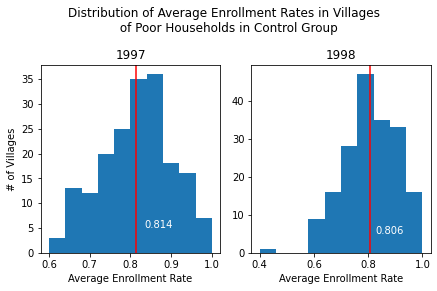

In [74]:
# 1.5 Graphical Exploration, Pt. 2

# create dataframe with poor households in villages in control group
pg_poor_cntrl = pg[ (pg.poor == 1) & (pg.progresa == 0)]

# create figure with subplots
fig2 = plt.figure()
f2ax1 = fig2.add_subplot(1, 2, 1)
f2ax2 = fig2.add_subplot(1, 2, 2)

# calculate average enrollment rates (`sc`) of poor houses in control group villages
# grouped by villages, for '97 and '98
avgs_sc97_c = pg_poor_cntrl[ pg_poor_cntrl['year'] == 97 ].groupby('village')['sc'].mean()
avgs_sc98_c = pg_poor_cntrl[ pg_poor_cntrl['year'] == 98 ].groupby('village')['sc'].mean()

# create 2 histograms for average enrollment of poor houses in control group villages, for '97 and '98
f2ax1.hist( avgs_sc97_c )
f2ax2.hist( avgs_sc98_c )

# calculate average of averages
avg_sc97_c = avgs_sc97_c.mean()
avg_sc98_c = avgs_sc98_c.mean()

# add line for average of averages
f2ax1.axvline( x = avg_sc97_c, color='red' )
f2ax2.axvline( x = avg_sc98_c, color='red' )
f2ax1.text( x = avg_sc97_c + 0.02, y = 5, s = avg_sc97_c.round(3), color = 'white' )
f2ax2.text( x = avg_sc98_c + 0.02, y = 5, s = avg_sc98_c.round(3), color = 'white' )

# format chart: add title, axes labels, spacing
fig2.suptitle('Distribution of Average Enrollment Rates in Villages \n of Poor Households in Control Group')
fig2.tight_layout( rect=[0, 0.03, 1, 0.95] )

f2ax1.title.set_text('1997')
f2ax1.set_ylabel('# of Villages')
f2ax1.set_xlabel('Average Enrollment Rate')

f2ax2.title.set_text('1998')
f2ax2.set_xlabel('Average Enrollment Rate')

fig2.show()

# conduct t-test and retrieve t-statistic and p-value
t2, p2 = ttest_ind(pg_poor_cntrl[ pg_poor_cntrl['year'] == 97 ]['sc'], \
    pg_poor_cntrl[ pg_poor_cntrl['year'] == 98 ]['sc'], \
    nan_policy='omit', equal_var=False)

# print statistics
print('Average Enrollment Rate in 1997:', avg_sc97_c.round(4))
print('Average Enrollment Rate in 1998:', avg_sc98_c.round(4))
print('t-statistic:', t2.round(4))
print('p-value:', p2)

<font color='#2986cc'>

With p-value of ~0.15, there is a _no_ statistically significant difference in the means of control group in 1997 and 1998. While the means go down from 0.8138 to 0.8062, it is not a statistically significant change.

</font>

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [75]:
print('Average Enrollment Rate of Poor Households')
print('in Treatment Villages:', pg_poor_treat[ pg_poor_treat.year == 98 ]['sc'].mean().round(4))
print('in Control Villages:', pg_poor_cntrl[ pg_poor_cntrl.year == 98 ]['sc'].mean().round(4))

t3, p3 = ttest_ind( pg_poor_treat[ pg_poor_treat.year == 98 ]['sc'].dropna(), \
                    pg_poor_cntrl[ pg_poor_cntrl.year == 98 ]['sc'].dropna(), \
                    equal_var = False )

print('p-value:', p3)

Average Enrollment Rate of Poor Households
in Treatment Villages: 0.8465
in Control Villages: 0.8076
p-value: 2.9655072988948406e-16


<font color='#2986cc'>

With p-value of ~2.97e-16, there is a statistically significant difference between enrollment rates of the treatment group and the control group. The null hypothesis (that there is no difference in average enrollment rate of the treatment and control group in 1998) is rejected and alternative hypothesis (that there is a difference between treatment and control in 1998) is accepted.

The enrollment rate of the treatment group was 0.8465 and of the control group was 0.8076.

</font>

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [76]:
# import libraries
import statsmodels.formula.api as smf

# filter dataframe: poor households in 1998
pg_poor_98 = pg[ (pg.poor == 1) & (pg.year == 98) ]

# fit linear model: enrollment rate on treatment assignment
lm1 = smf.ols( formula='sc ~ progresa', data=pg_poor_98 ).fit()

# print p-value of correlation coefficient for `progresa` variable
print('corr coef:', lm1.params[1])
print('p-value:', lm1.pvalues[1])
print('Std Error:', lm1.bse[1])

# print summary of fitted linear model
lm1.summary()

corr coef: 0.03884216466511872
p-value: 6.636344447488953e-17
Std Error: 0.004646903117747415


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           6.64e-17
Time:                        20:56:51   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.000       0.800       0.815
progresa       0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.

<font color='#2986cc'>PROGRESA program resulted in almost 4 more children for every 100 children (i.e., almost 4% more likely) to being enrolled in school), who likely would not have been in school otherwise.</font>

How does your regression estimate compare to your t-test estimate from part 2.1?

<font color='#2986cc'>In 2.1, the simple difference of means was ~0.0389 (0.8465 for treatment minus 0.8076 for control), which was statistically significant with p-value of 0.297e-16. In 2.2, the correlation coefficient was 0.0388, which was statistically significant with p-value of 6.64e-17. Both regression estimate and t-test estimate show approximately 4% increase in school enrollment rate for treatment group.</font>

Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 

<font color='#2986cc'>Yes. With p-value of 6.64e-17, the correlation between treatment assignment and increase in enrollment rate is statistically significant (p < 0.05). Therefore, we can reject the null hypothesis that there is no correlation and accept the alternative hypothesis.</font>

What is the counterfactual assumption underlying this regression?

<font color='#2986cc'>In the absence of treatment, the households in the treatment group would have the same enrollment rate as the households in the control group.</font>

### 2.3 Multiple Regression

Re-run the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [77]:

# fit linear model: enrollment rate on treatment assignment
lm2 = smf.ols( formula='sc ~ progresa + dist_cap + dist_sec + hohage + \
                    hohedu + hohwag + min_dist + sex + welfare_index', \
                    data=pg_poor_98 ).fit()

# print p-value of correlation coefficient for `progresa` variable
print('Coefficient for Treatment:', lm2.params[1].round(4))
print('p-value:', lm2.pvalues[1])
print('Std Error:', lm2.bse[1])

# print summary of fitted linear model
lm2.summary()


Coefficient for Treatment: 0.0337
p-value: 2.5861743553913266e-13
Std Error: 0.004606863249744663


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     100.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.52e-185
Time:                        20:56:51   Log-Likelihood:                -11451.
No. Observations:               27363   AIC:                         2.292e+04
Df Residuals:                   27353   BIC:                         2.300e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8823      0.017     52.065      0.000       0.849       0.916
progresa          0.0337      0.005      7.318      0.000       0.025       0.043
dist_cap          0.0002   3.96e-05      6.025      0.000       0.000       0.000
dist_sec         -0.0096      0.001     -9.474      0.000      -0.012      -0.008
hohage           -0.0025      0.000    -11.197      0.000      -0.003      -0.002
hohedu            0.0111      0.001     11.283      0.000       0.009       0.013
hohwag        -2.228e-06   3.23e-06     -0.691      0.490   -8.55e-06    4.09e-06
min_dist          0.0004   7.29e-05      5.421      0.000       0.000       0.001
sex               0.0249      0.004      5.599      0.000       0.016       0.034
welfare_index -9.279e-05   2.02e-05     -4.592      0.000      -0.000   -5.32e-05
==============================================================================
Omnibus:                     7183.545   Durbin-Watson:                   1.761
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14286.818
Skew:                          -1.688   Prob(JB):                         0.00
Kurtosis:                       4.068   Cond. No.                     7.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

How do the controls affect the point estimate of treatment effect?

<font color='#2986cc'>Introducing control variables decreased the point estimate of treatment effect, as some of the correlational effects become attributed to the control variables. The correlation coefficient for treatment assignment decreased marginally from 0.0388 to 0.0337.

Of the control variables, 7 out of 8 were statistically significant with p < 0.05, which means their impact on the treatment effect is statistically valid. However, 5 of the 7 statistically significant control variables have very small coefficients (< 0.01), except `sex` with 0.02 and `hohedu` with 0.01.</font>

How do the controls affect the standard error on the treatment effect? 

<font color='#2986cc'>The standard error for treatment assignment (`progresa`) decreased slightly, from 0.00464 to 0.00461. This is explained by the fact that as control variables account for more of the variability in the enrollment rates, the regression becomes more accurate and the standard error (average absolute distance from the regression line) of treatment variable decreases. However, just as the coefficients are extremely small as shown in the previous answer, the reduction in error is negligibly small as well.</font>

How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

<font color='#2986cc'>The decrease in correlation coefficient of treatment assignment from simple regression to multiple regression suggest that the treatment effect of PROGRESA is slightly smaller than originally thought. There are other factors, such as those introduced as control variables, that also affect the enrollment rates. However, the correlation is still the strongest with the treatment variable, showing that PROGRESA did have a non-negligible impact on educational attainment.</font>

Interpret the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

<font color='#2986cc'>The coefficient for `dist_sec` variable (distance from a secondary school) is -0.0096 and it is statistically significant. While this means that the distance from a secondary school is negatively correlated school enrollment, **regression analysis cannot prove that this has a causal impact on school enrollment**. It may _seem_ reasonable to say that being close to school _causes_ households to send their children to school, it is equally possible that households who live far from schools believed that schools are less important to begin with. Therefore, we cannot presume a causal impact.</font>

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [78]:
# Create dataframe
dd = pd.DataFrame( index=['Control', 'Treatment', 'Diff (98-97)'],
                   columns=['1997', '1998', 'Diff (T-C)'] )

# Calculate average enrollment rates
dd.loc['Control', '1997'] = pg_poor_cntrl[ pg_poor_cntrl.year == 97 ]['sc'].mean()
dd.loc['Control', '1998'] = pg_poor_cntrl[ pg_poor_cntrl.year == 98 ]['sc'].mean()
dd.loc['Treatment', '1997'] = pg_poor_treat[ pg_poor_treat.year == 97 ]['sc'].mean()
dd.loc['Treatment', '1998'] = pg_poor_treat[ pg_poor_treat.year == 98 ]['sc'].mean()

# Calculate DD: Control and Treatment, from 1997 to 1998
dd.loc['Control', 'Diff (T-C)'] = dd.loc['Control', '1998'] - dd.loc['Control', '1997']
dd.loc['Treatment', 'Diff (T-C)'] = dd.loc['Treatment', '1998'] - dd.loc['Treatment', '1997']

# Calculate DD: 1997 and 1998, for Treatment - Control
dd.loc['Diff (98-97)', '1997'] = dd.loc['Treatment', '1997'] - dd.loc['Control', '1997']
dd.loc['Diff (98-97)', '1998'] = dd.loc['Treatment', '1998'] - dd.loc['Control', '1998']


display(dd)
print('Difference-in-Difference (98-97):', dd.loc['Diff (98-97)', '1998'] - dd.loc['Diff (98-97)', '1997'])
print('Difference-in-Difference (T-C):', dd.loc['Treatment', 'Diff (T-C)'] - dd.loc['Control', 'Diff (T-C)'])

,1997,1998,Diff (T-C)
Control,0.815186,0.807637,-0.007549
Treatment,0.822697,0.846479,0.023782
Diff (98-97),0.007511,0.038842,NaN


Difference-in-Difference (98-97): 0.031331280319323085
Difference-in-Difference (T-C): 0.031331280319323085


What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?

<font color='#2986cc'>The difference-in-difference estimate is 0.0313, which is smaller than the simple difference estimate of 0.0388. The decrease can be understood as controlling for the changes (increase in enrollment) that occured in the control villages.</font>

What is the counterfactual assumption underlying this estimate? 

<font color='#2986cc'>In absence of treatment, the difference in enrollment rates between treatment group from 1997 to 1998 and the difference in enrollment rates between the control group from 1997 to 1998 would have been the same. In other words, difference-in-difference would be zero.</font>

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [79]:
# 2.5 Difference-in-Difference (i)

# Regress on difference-in-difference on poor households
# y = intercept + a*before/after[0,1] + b*progresa[0,1] + c * year*progresa[0,1]
lm3 = smf.ols(formula='sc ~ C(year) + progresa + C(year)*progresa',
              data=pg[['progresa','sc','year','poor']][ pg.poor == 1 ].dropna()).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           2.76e-18
Time:                        20:56:52   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.8152      0.003    233.182      0.000       0.808       0.822
C(year)[T.98]             -0.0075      0.005     -1.480      0.139      -0.018       0.002
progresa                   0.0075      0.004      1.691      0.091      -0.001       0.016
C(year)[T.98]:progresa     0.0313      0.006      4.835      0.000       0.019       0.044
==============================================================================
Omnibus:                    15346.988   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30608.651
Skew:                          -1.711   Prob(JB):                         0.00
Kurtosis:                       3.937   Cond. No.                         7.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
pg.isnull().sum()

year                0
sex                24
indig             300
dist_sec            0
sc               8453
grc              6549
fam_n               0
min_dist            0
dist_cap            0
poor                0
progresa            0
hohedu              0
hohwag              0
welfare_index     210
hohsex             20
hohage             10
age                 0
village             0
folnum              0
grc97               0
sc97             3872
dtype: int64

In [81]:
# 2.5 Difference-in-Difference (ii)

# Regress on difference-in-difference on poor households
# y = intercept + b1*before/after[0,1] + b2*progresa[0,1] + b3*year*progresa[0,1] + b_[i,j]*control variables_[i,j]
lm4 = smf.ols(formula='sc ~ C(year) + progresa + C(year)*progresa \
                    + dist_cap + dist_sec + hohage \
                    + hohedu + min_dist + sex + welfare_index',
              data=pg[['sc','year','progresa','dist_cap','dist_sec',\
                       'hohage','hohedu','min_dist','sex','welfare_index']][ pg.poor == 1 ].dropna()).fit()

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     173.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:56:52   Log-Likelihood:                -25314.
No. Observations:               58192   AIC:                         5.065e+04
Df Residuals:                   58181   BIC:                         5.075e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.9006      0.012     75.026      0.000       0.877       0.924
C(year)[T.98]             -0.0080      0.005     -1.580      0.114      -0.018       0.002
progresa                   0.0032      0.004      0.725      0.469      -0.005       0.012
C(year)[T.98]:progresa     0.0306      0.006      4.778      0.000       0.018       0.043
dist_cap                   0.0002   2.75e-05      8.433      0.000       0.000       0.000
dist_sec                  -0.0086      0.001    -11.887      0.000      -0.010      -0.007
hohage                    -0.0023      0.000    -15.292      0.000      -0.003      -0.002
hohedu                     0.0111      0.001     16.219      0.000       0.010       0.012
min_dist                   0.0004   5.09e-05      7.449      0.000       0.000       0.000
sex                        0.0287      0.003      9.268      0.000       0.023       0.035
welfare_index             -0.0001   1.41e-05     -8.688      0.000      -0.000   -9.45e-05
==============================================================================
Omnibus:                    14454.916   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27853.382
Skew:                          -1.637   Prob(JB):                         0.00
Kurtosis:                       3.874   Cond. No.                     5.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
print('(i) DD Regression without Control Variables')
print('Coefficient:', lm3.params[3].round(4))
print('p-value', lm3.pvalues[3].round(6) )
print('Std Error:', lm3.bse[3].round(4) )

print('(ii) DD Regression with Control Variables')
print('Coefficient:', lm4.params[3].round(4) )
print('p-value', lm4.pvalues[3].round(6) )
print('Std Error:', lm4.bse[3].round(4) )

(i) DD Regression without Control Variables
Coefficient: 0.0313
p-value 1e-06
Std Error: 0.0065
(ii) DD Regression with Control Variables
Coefficient: 0.0306
p-value 2e-06
Std Error: 0.0064


What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.

<font color="#2986cc"> The DD estimator (correlation coefficient) of PROGRESA was 0.0313, which was statistically significant with a p-value of 1e-6 (p < 0.05). This result suggests that for every 100 children in a poor household, 3 more children enrolled in school, a year after they benefitted from PROGRESA (i.e., treatment villages, ex post).

The standard error was 0.0065, which means that the estimator was on average off by +/-0.0065, so the actual impact on enrollment could have been 0.0248 or 0.0378. In either case, the result is that approximately 3 more children for every 100 were able to enroll in school due to PROGRESA who would not have been otherwise.</font>

Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?

<font color="#2986cc"> The DD estimator (correlation coefficient) of PROGRESA with 7 more contro l variables was 0.0306, which was statistically significant with a p-value of 2e-6 (p < 0.05). The marginal decrease in the estimator is from introducing the new control variables, each of which account for more of the impact on enrollment (as quantified by each of their estimators).

The small decrease attests to the overall practical significance of the PROGRESA program, as it still led to approximately 3 more children of every 100 enroll in school who would not have been able to otherwise, even while controlling for several key factors. </font>

How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?

<font color="#2986cc"> The DD estimator from tabular calculation was 0.0313, which was the same as the DD estimator from regression model. As mentioned in previous lectures, this can be proven algebraically to be the equivalent. The DD estimator with control variables was 0.0306, and the reason for this decrease was explained in the previous question.</font>

What is the counterfactual assumption underlying regression (ii)? 

<font color="#2986cc"> In absence of treatment, the difference in enrollment rates for poor households in treatment villages would have been the same as those in control villages, even while accounting for other factors (`dist_cap`, `dist_sec`, `hohage`, `hohedu`, `min_dist`, `sex`, `welfare_index`)</font>

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [83]:
# 2.6 Spillover Effects

# 2.6.(a) Regress on difference-in-difference on non-poor households

lm5 = smf.ols(formula='sc ~ C(year) + progresa + C(year)*progresa',
              data=pg[['progresa','sc','year','poor']][ pg.poor == 0 ].dropna()).fit()

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.332
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           0.000276
Time:                        20:56:52   Log-Likelihood:                -5448.5
No. Observations:               10425   AIC:                         1.090e+04
Df Residuals:                   10421   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.7626      0.009     89.682      0.000       0.746       0.779
C(year)[T.98]              0.0138      0.013      1.079      0.280      -0.011       0.039
progresa                   0.0327      0.011      2.978      0.003       0.011       0.054
C(year)[T.98]:progresa  3.428e-05      0.016      0.002      0.998      -0.032       0.032
==============================================================================
Omnibus:                     2002.335   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3446.137
Skew:                          -1.408   Prob(JB):                         0.00
Kurtosis:                       2.994   Cond. No.                         7.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Check how many non-poor households received treatment

print('# of non-poor households that received treatment:')
print('in 1997:', pg[ (pg.poor == 0) & (pg.progresa == 1) & (pg.year == 97)][['sc','progresa','year','poor']].dropna().shape[0])
print('in 1998:', pg[ (pg.poor == 0) & (pg.progresa == 1) & (pg.year == 98)][['sc','progresa','year','poor']].dropna().shape[0])
pg[ (pg.poor == 0) & (pg.progresa == 1)][['sc','progresa','year','poor']].value_counts()

# of non-poor households that received treatment:
in 1997: 3463
in 1998: 2807


sc   progresa  year  poor
1.0  1         97    0       2754
               98    0       2271
0.0  1         97    0        709
               98    0        536
dtype: int64

In [85]:
# 2.6.(b) Regress PROGRESA on OTHER outcomes besides enrollment rates for poor households

lm6 = smf.ols(formula='hohwag ~ C(year) + progresa + C(year)*progresa + sc',
              data=pg[['progresa','welfare_index','year','poor', 'sc', 'hohwag']][ pg.poor == 1 ].dropna()).fit()

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hohwag   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     14.91
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           3.52e-12
Time:                        20:56:52   Log-Likelihood:            -4.6465e+05
No. Observations:               58220   AIC:                         9.293e+05
Df Residuals:                   58215   BIC:                         9.294e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                552.3399      9.087     60.784      0.000     534.529     570.150
C(year)[T.98]              8.1571      9.547      0.854      0.393     -10.556      26.870
progresa                 -31.0166      8.305     -3.735      0.000     -47.294     -14.739
C(year)[T.98]:progresa   -15.4178     12.116     -1.272      0.203     -39.166       8.330
sc                        34.3389      7.736      4.439      0.000      19.176      49.502
==============================================================================
Omnibus:                    72243.546   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13893946.591
Skew:                           6.730   Prob(JB):                         0.00
Kurtosis:                      77.474   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?

<font color="#2986cc"> The DD estimator of PROGRESA treatment for non-poor households was _not_ statistically significant, with p-value of 0.998 (p > 0.05). The estimator itself was small as well, with the coefficient at 3.43e-5.

However, the DD estimator for PROGRESA (`progresa`) not accounting for baseline and endline, had a high value of 0.0327 with p-value of 0.003. While this suggest any significant effect or causality of PROGRESA, there is a positive association with PROGRESA and enrollment rates that is evidenced here (more exploration on this in next question).</font>

Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

<font color="#2986cc"> As the results above show, approximately 3,400 non-poor households received PROGRESA in 1997 and 2,800 in 1998. These households could have used this to enroll their children they may not have been unable to otherwise for unobserved factors, such as sudden financial hardship.

For non-poor households that did not receive treatment, they could have benefited from the extra cash injection into the villages. The households that did receive it would have used it in the local community, making the cash injection diffuse throughout the community. This extra disposable income, in turn, could have been used for educational and health purposes.</font>

Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

<font color="#2986cc"> The wage of the head of household (`hohwag`) was negatively correlated with PROGRESA, but it was not statistically significant. Controlling for school enrollment of children (`sc`), it shows that enrollment is positively correlated with `hohwag`, which may be that richer households send their children to school more. While statistically _insignificant_, the negative correlation of `hohwag` with PROGRESA could mean that if you were receiving PROGRESA, you were poor to begin with, thus becoming more likely to be eligible for PROGRESA.</font>

### 2.7 Summary

Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 

<font color="#2986cc"> Per instructor's note on Piazza (https://piazza.com/class/kyb03qf4ao038s?cid=46), below answer was not changed</font>

Using several different empirical frameworks, we have explored the impact of the PROGRESA program on enrollment rates of poor households in Mexico. In general, it appears that PROGRESA did have positive impact on the school enrollment rates, though the exact estimate depends on the method used to measure impact. After controlling for other observable characteristics, the most reliable difference-in-difference estimator estimates that PROGRESA raised enrollment rates by roughly 3.13 percentage points. A separate estimator, that includes externalities on non-poor households, produces a more conservative, and statistically insignificant, estimate.